|--n--|----xn----|---|f(xn)|---|
|--0--|0.7071068|5.700877125495690|
|--1--|1.6677080|2.872621298570349|
|--2--|1.4353681|0.576297482737879|
|--3--|1.4145674|0.064694889588892|
|--4--|1.4142137|0.001355733246442|
|--5--|1.4142136|0.000000648592056|
|--6--|1.4142136|0.000000000000149|
|--7--|1.4142136|0.000000000000000|
Newton method converged, n=8, |F(xn)|=0.0e+00

[1. 1.]


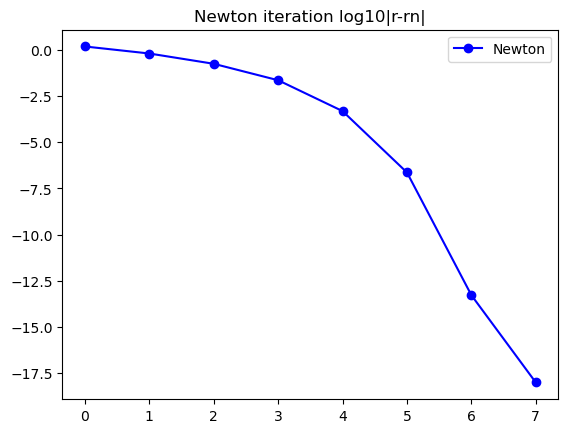

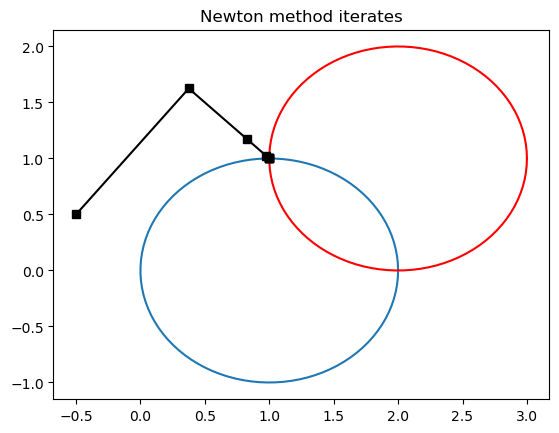

Error: matrix too close to singular
Newton method failed to converge, n=100, |F(xn)|=1.4e+00

[2 1]
Error: matrix too close to singular
Newton method failed to converge, n=1000, |F(xn)|=1.8e+01



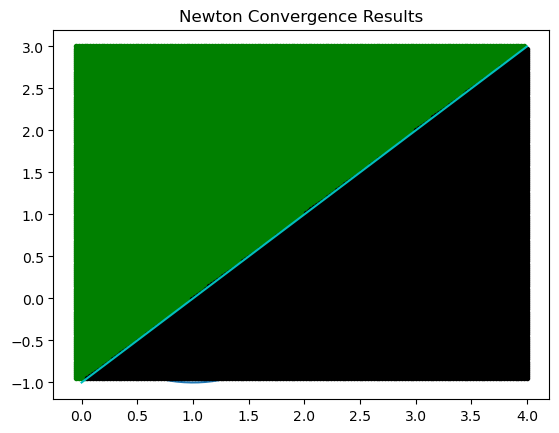

C:\Users\ajpat\AppData\Local\Temp\ipykernel_8308\1537854411.py:119: RuntimeWarning: divide by zero encountered in log10
  surf=ax.plot_surface(X,Y,np.log10(Z),cmap=cm.coolwarm,linewidth=0, antialiased=False);


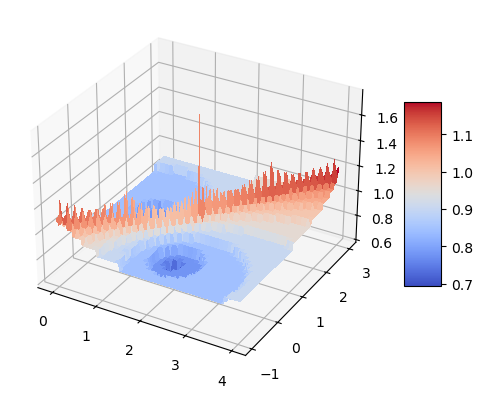

|--n--|----xn----|---|f(xn)|---|
|--0--|5.0000000|31.202556399691453|
|--1--|37.6261426|562.930324137439698|
|--2--|25.8101452|159.867323168367534|
|--3--|18.7489810|41.271038624769986|
|--4--|15.4031190|8.038988393244168|
|--5--|14.5200584|0.780992270700349|
|--6--|14.4459551|0.017519214859159|
|--7--|14.4450246|0.000018300092106|
|--8--|14.4450241|0.000000000029125|
|--9--|14.4450241|0.000000000000005|
Newton method converged, n=10, |F(xn)|=4.3e-15

100
0.018801300000632182
|--n--|----xn----|---|f(xn)|---|
|--0--|7.0710678|44.182707838652902|
|--1--|52.3042169|746.409403238437221|
|--2--|35.9219477|211.335006718903060|
|--3--|26.1862235|53.986116198080367|
|--4--|21.6466164|10.113794197081011|
|--5--|20.4900757|0.836154852960795|
|--6--|20.4015026|0.010987779818349|
|--7--|20.4007176|0.000003607552368|
|--8--|20.4007174|0.000000000000731|
|--9--|20.4007174|0.000000000000006|
Newton method converged, n=10, |F(xn)|=5.7e-15

200
0.019403499987674877
|--n--|----xn----|---|f(xn)|---|
|--0

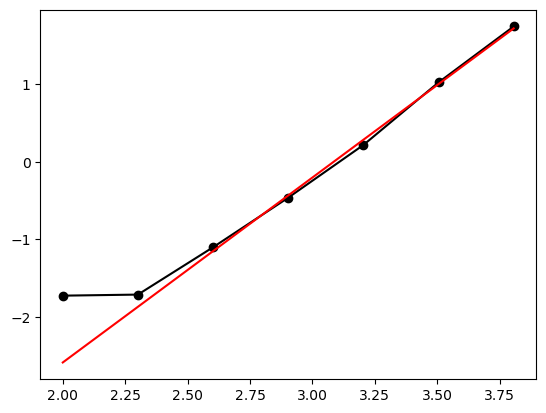

In [1]:
import numpy as np
from numpy import random as rand
import time
import math
from scipy import io, integrate, linalg, signal
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Video
from mpl_toolkits.mplot3d import Axes3D
from timeit import default_timer as timer

def driver():
    ############################################################################
    ############################################################################
    # Rootfinding example start. You are given F(x)=0.

    #First, we define F(x) and its Jacobian.
    def F(x):
        return np.array([(x[0]-4)**2+2*(x[1]-2)**2-32 , x[1]*(x[0]-2)-16 ]);
    def JF(x):
        return np.array([[2*(x[0]-4),4*(x[1]-2)],[x[1],(x[0]-2)]]);

    # Apply Newton Method:
    #x0 = np.array([4.0,4.0]); tol=1e-14; nmax=100;
    #(rN,rnN,nfN,nJN) = newton_method_nd(F,JF,x0,tol,nmax,True);
    #print(rN)

    #x0 = np.array([9.0,2.0]); tol=1e-14; nmax=100;
    #(rN,rnN,nfN,nJN) = newton_method_nd(F,JF,x0,tol,nmax,True);
    #print(rN)

    # Plots
    #numN = rnN.shape[0];
    #errN = np.max(np.abs(rnN[0:(numN-1)]-rN),1);
    #plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'b-o',label='Newton');
    #plt.title('Newton iteration log10|r-rn|');
    #plt.legend();
    #plt.show();

    #Intersection of two circles example:
    def F2(x):
        v = np.array([(x[0]-1)**2 + x[1]**2 -1,
                 (x[0]-2)**2 + (x[1]-1)**2 -1])
        return v;
    def JF2(x):
        M = np.array([[2*(x[0]-1),2*x[1]],[2*(x[0]-2),2*(x[1]-1)]]);
        return M;

    a=0.2;
    """def F2(x):
        v = np.array([(x[0]-1)**2 + x[1]**2 -1 + a*((x[0]-1)**3)*(x[0]-2),
                 (x[0]-2)**2 + (x[1]-1)**2 -1 + a*((x[1]-1)**3)*(x[1])])
        return v;
    def JF2(x):
        M = np.array([[2*(x[0]-1) + a*((3*(x[0]-1)**2)*(x[0]-2) + (x[0]-1)**3),2*x[1]],[2*(x[0]-2),2*(x[1]-1) + a*((3*(x[1]-1)**2)*(x[1]) + (x[1]-1)**3)]]);
        return M;"""

    # Apply Newton Method:
    x0 = np.array([-0.5,0.5]); tol=1e-14; nmax=100;
    (rN,rnN,nfN,nJN) = newton_method_nd(F2,JF2,x0,tol,nmax,True);
    print(rN)

    # Plots
    numN = rnN.shape[0];
    errN = np.max(np.abs(rnN[0:(numN-1)]-rN),1);
    plt.plot(np.arange(numN-1),np.log10(errN+1e-18),'b-o',label='Newton');
    plt.title('Newton iteration log10|r-rn|');
    plt.legend();
    plt.show();

    th = np.linspace(0,2*np.pi,100);
    plt.plot(np.cos(th)+1,np.sin(th));
    plt.plot(np.cos(th)+2,np.sin(th)+1,'r');
    plt.plot(rnN[:,0],rnN[:,1],'k-s');
    plt.title("Newton method iterates");
    plt.show();

    ##########################################################################
    # What happens when we start at x0 such that JF is not invertible?
    x0 = np.array([2,1]); tol=1e-14; nmax=100;
    (rN,rnN,nfN,nJN) = newton_method_nd(F2,JF2,x0,tol,nmax,True);
    print(rN)

    ##########################################################################
    # Convergence basins / number of iterates
    nX=160;nY=160;
    (xx,yy) = np.meshgrid(np.linspace(-0.05,4,nX),np.linspace(-0.95,3,nY));
    xx = xx.flatten(); yy=yy.flatten();
    N = nX*nY;
    ra = np.zeros((N,2));
    nfa = np.zeros(N); nJa=nfa;

    for i in np.arange(N):
        x0 = np.array([xx[i],yy[i]]);
        (ra[i,:],rn,nfa[i],nJa[i])=newton_method_nd(F2,JF2,x0,1e-15,1000,False);

    e1 = np.linalg.norm(ra - np.array([1,1]),axis=1);
    e2 = np.linalg.norm(ra - np.array([2,0]),axis=1);
    xl=np.linspace(0,4,10); yl=xl-1;
    plt.plot(np.cos(th)+1,np.sin(th));
    plt.plot(np.cos(th)+2,np.sin(th)+1,'r');
    plt.plot(xx[e1<1e-14],yy[e1<1e-14],'g.');
    plt.plot(xx[e2<1e-14],yy[e2<1e-14],'k.');
    plt.plot(xl,yl,'c');
    plt.title("Newton Convergence Results");
    plt.show();

    ####################################################################
    # 3D iterate plot
    X = xx.reshape(nX,nY);
    Y = yy.reshape(nX,nY);
    Z = 1.0*nfa.reshape(nX,nY);
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    surf=ax.plot_surface(X,Y,np.log10(Z),cmap=cm.coolwarm,linewidth=0, antialiased=False);
    fig.colorbar(surf, shrink=0.5, aspect=5);
    plt.show()
    ###########################################################################
    # Examples as size of the system increases

    MM = np.array([100,200,400,800,1600,3200,6400]);
    n=0;
    NewtonT=np.zeros(MM.size);

    for M in MM:

        U = rand.random_sample((M,M));
        (Q,R)=np.linalg.qr(U);
        def FunM(x):
            return x**3+0.1*Q@x+3;
        def JFunM(x):
            return np.diag(3*(x**2),0)+0.1*Q;

        start = timer()
        x0 = 0.5*np.ones(M);
        (r,rn,nf,nJ)=newton_method_nd(FunM,JFunM,x0,1e-13,20,verb=True);
        end = timer();
        NewtonT[n]=end - start;
        print(M)
        print(NewtonT[n])
        n+=1;

    # We plot log(M) vs log(Time) and estimate m such that Time ~ C*N^m
    plt.plot(np.log10(MM),np.log10(NewtonT),'k-o');
    (m,b)=np.polyfit(np.log10(MM[2:7]),np.log10(NewtonT[2:7]),1);
    xl=np.linspace(np.log10(MM[0]),np.log10(MM[-1]),10); yl=m*xl+b;
    plt.plot(xl,yl,'r');
    print(m);
    plt.show();

################################################################################
# Newton method in n dimensions implementation
def newton_method_nd(f,Jf,x0,tol,nmax,verb=False):

    # Initialize arrays and function value
    xn = x0; #initial guess
    rn = x0; #list of iterates
    Fn = f(xn); #function value vector
    n=0;
    nf=1; nJ=0; #function and Jacobian evals
    npn=1;

    if (len(x0)<100):
        if (np.linalg.cond(Jf(x0)) > 1e16):
            print("Error: matrix too close to singular");
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
            r=x0;
            return (r,rn,nf,nJ);

    if verb:
        print("|--n--|----xn----|---|f(xn)|---|");

    while npn>tol and n<=nmax:
        # compute n x n Jacobian matrix
        Jn = Jf(xn);
        nJ+=1;

        if verb:
            print("|--%d--|%1.7f|%1.15f|" %(n,np.linalg.norm(xn),np.linalg.norm(Fn)));

        # Newton step (we could check whether Jn is close to singular here)
        pn = -np.linalg.solve(Jn,Fn);
        xn = xn + pn;
        npn = np.linalg.norm(pn); #size of Newton step

        n+=1;
        rn = np.vstack((rn,xn));
        Fn = f(xn);
        nf+=1;

    r=xn;

    if verb:
        if np.linalg.norm(Fn)>tol:
            print("Newton method failed to converge, n=%d, |F(xn)|=%1.1e\n" % (nmax,np.linalg.norm(Fn)));
        else:
            print("Newton method converged, n=%d, |F(xn)|=%1.1e\n" % (n,np.linalg.norm(Fn)));

    return (r,rn,nf,nJ);

# Execute driver
driver()
